In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib
matplotlib.style.use('ggplot') 
n=12 # number of colors
colors=cm.rainbow(np.linspace(0,1,n))

In [35]:
file_mcscan = '../Ca2Ca.collinearity.kaks'
file_gff    = '../Ca2Ca.gff'

df         = pd.read_csv(file_mcscan,sep='\t',comment='#',header=None)
df.columns = ['synID','GeneA','GeneB','EV','Ka','Ks']

df['syn_block_#'] = df['synID'].apply(lambda x :x.split('-')[0])

df['GeneA_chr']   = df['GeneA'].apply(lambda x : int(x.split('g')[0].replace('mRNA.CA','')))
df['GeneB_chr']   = df['GeneB'].apply(lambda x : int(x.split('g')[0].replace('mRNA.CA','')))

df_gff = pd.read_csv(file_gff,header=None,sep='\t')
df_gff.set_index(1,inplace=True)

df['GeneA_loc']   = df['GeneA'].apply(lambda x : df_gff.loc[x][2])

mask = (df['Ks'].astype(float) >= 0)
df = df[mask]

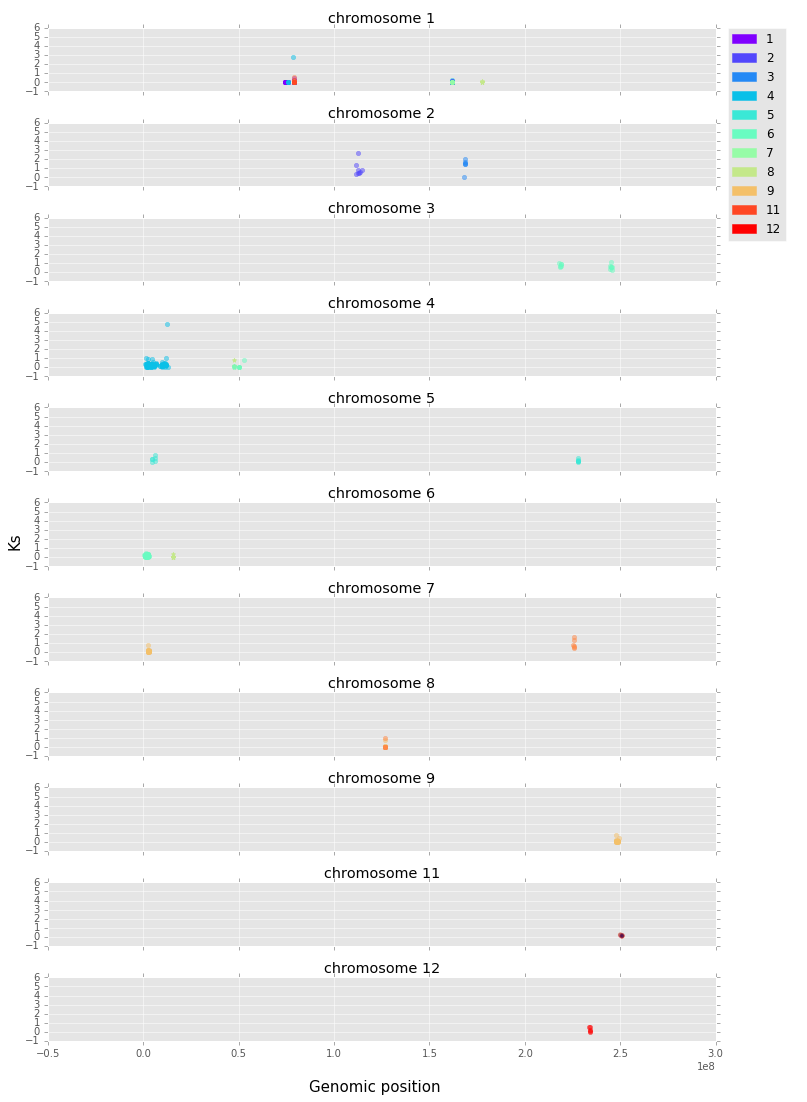

In [96]:
chromosome_list = list(set(df['GeneA_chr']))
fig, ax = plt.subplots(len(chromosome_list),figsize=(10,15),sharex=True,sharey=True)

for n, echr in enumerate(chromosome_list):
    mask = (df['GeneA_chr'] == echr)
    edf  = df[mask]
    for tchr in list(set(edf['GeneB_chr'])):
        mask = edf['GeneB_chr'] == tchr
        eedf = edf[mask]
        if tchr == 8:
            ax[n].scatter(eedf['GeneA_loc'],eedf['Ks'],color=colors[tchr-1],marker=(5, 1))#,s=len(eedf))
        else:
            ax[n].scatter(eedf['GeneA_loc'],eedf['Ks'],color=colors[tchr-1],alpha=0.5)#,s=len(eedf))
        ax[n].set_title('chromosome %s'%echr)
        
        
fig.text(0.5, -0.01, 'Genomic position', ha='center',fontsize=15)
fig.text(-0.01, 0.5, 'Ks', va='center', rotation='vertical',fontsize=15)
plt.figlegend([mpatches.Patch(color=colors[x-1]) for x in chromosome_list],chromosome_list,bbox_to_anchor=[1.1,1],loc='upper right')
plt.tight_layout()